<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

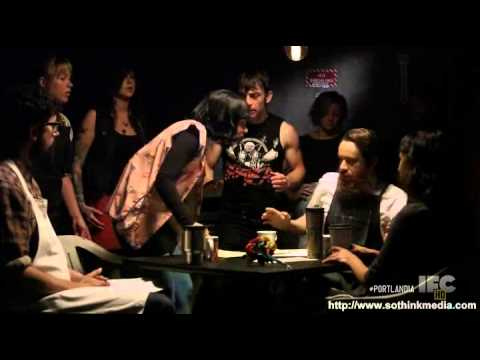

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/nsriniva/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Start here 
shops.shape

(7616, 3)

In [5]:
from re import compile as rcompile

date_re = rcompile(r'\b[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}\b')

shops.full_review_text = shops.full_review_text.apply(lambda x: date_re.sub('',x).strip().lower())

shops.star_rating = shops.star_rating.apply(lambda x: int(x.split('.')[0]))

display(shops.shape)
shops.head(5)

(7616, 3)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 check-in love love loved the atmosphere! eve...,5
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aust...",4
2,The Factory - Cafe With a Soul,1 check-in listed in brunch spots i loved the ...,4
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating how...,2
4,The Factory - Cafe With a Soul,1 check-in they are located within the northcr...,4


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [6]:

from spacy import load as sp_load
from spacy.tokenizer import Tokenizer

nlp = sp_load('en_core_web_lg', disable=['parser', 'tagger'])

tokenizer = Tokenizer(nlp.vocab)

STOP_WORDS = ['coffee', 'place', '1', 'check-in', ' ', "it's", 'come', "i'm", 'get','try', 'drink', "i've", 'order','shop','work','little', "don't", 'time','ice', "didn't", "wasn't"]

def tokenize(x):
    
    tokens_ = tokenizer(x)

    tokens = [token.lemma_ for token in tokens_ if (token.is_stop == False and token.is_punct == False and token.pos_ != 'PRON' and token.lemma_ not in STOP_WORDS )]

    return tokens

shops['tokens'] = shops.full_review_text.apply(tokenize)


In [7]:
display(shops.shape)

display(shops.head())

display(shops.tokens.head())

(7616, 4)

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,1 check-in love love loved the atmosphere! eve...,5,"[love, love, love, atmosphere!, corner, style,..."
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aust...",4,"[list, date, night:, austin,, ambiance, austin..."
2,The Factory - Cafe With a Soul,1 check-in listed in brunch spots i loved the ...,4,"[list, brunch, spot, love, eclectic, homey, pl..."
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating how...,2,"[cool, decor!, good, nice, seat, however..., o..."
4,The Factory - Cafe With a Soul,1 check-in they are located within the northcr...,4,"[locate, northcross, mall, center, face, east,..."


0    [love, love, love, atmosphere!, corner, style,...
1    [list, date, night:, austin,, ambiance, austin...
2    [list, brunch, spot, love, eclectic, homey, pl...
3    [cool, decor!, good, nice, seat, however..., o...
4    [locate, northcross, mall, center, face, east,...
Name: tokens, dtype: object

In [8]:
from collections import Counter
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('great', 3274),
 ('like', 3153),
 ('good', 2897),
 ('love', 2239),
 ('well', 1693),
 ('nice', 1413),
 ('food', 1398),
 ('pretty', 1342),
 ('go', 1327),
 ('latte', 1285)]

In [9]:
def count(tokens):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """
    # stores the count of each token
    word_counts = Counter()
    
    # stores the number of docs that each token appears in 
    appears_in = Counter()

    total_docs = len(tokens)

    for token in tokens:
        # stores count of every appearance of a token 
        word_counts.update(token)
        # use set() in order to not count duplicates, thereby count the num of docs that each token appears in
        appears_in.update(set(token))

    # build word count dataframe
    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # rank the the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # calculate the percent total of each token
    wc['pct_total'] = wc['count'].apply(lambda token_count: token_count / total)

    # calculate the cumulative percent total of word counts 
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    # create dataframe for document stats
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    
    # merge word count stats with doc stats
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [10]:
# Use the Function
wc  = count(shops.tokens)
print(wc.shape)
wc.head()

(35165, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
87,great,2455,3274,1.0,0.009438,0.009438,0.322348
145,like,2171,3153,2.0,0.009089,0.018527,0.285058
152,good,2159,2897,3.0,0.008351,0.026878,0.283482
18,love,1749,2239,4.0,0.006454,0.033332,0.229648
401,well,1430,1693,5.0,0.004880,0.038212,0.187763


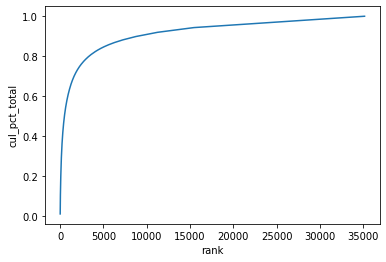

In [11]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [12]:
wc[wc['rank'] <= 1000]['cul_pct_total'].max()

0.6220960902615413

In [13]:
bad_reviews = shops[shops.star_rating <=3]
wc_bad = count(bad_reviews.tokens)
print(wc_bad.shape)
wc_bad.head()

(13833, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,like,575,892,1.0,0.011604,0.011604,0.389566
12,good,452,624,2.0,0.008118,0.019722,0.306233
95,go,306,395,3.0,0.005139,0.024861,0.207317
86,food,270,376,4.0,0.004892,0.029753,0.182927
85,great,268,353,5.0,0.004592,0.034345,0.181572


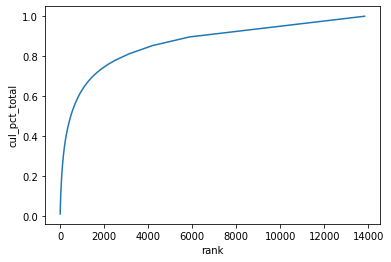

In [14]:
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc_bad);

In [15]:
wc_bad[wc_bad['rank'] <= 1000]['cul_pct_total'].max()

0.6324300415002571

In [16]:
good_reviews = shops[shops.star_rating >=4]
wc_good = count(good_reviews.tokens)
print(wc_good.shape)
wc_good.head()

(29695, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
87,great,2187,2921,1.0,0.010817,0.010817,0.356189
257,good,1707,2273,2.0,0.008417,0.019234,0.278013
181,like,1596,2261,3.0,0.008373,0.027607,0.259935
18,love,1547,1995,4.0,0.007388,0.034995,0.251954
375,well,1213,1436,5.0,0.005318,0.040313,0.197557


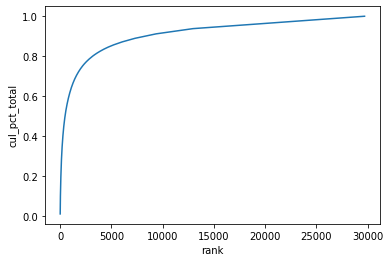

In [17]:
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc_good);

In [18]:
wc_good[wc_good['rank'] <= 1000]['cul_pct_total'].max()

0.6283569598127663

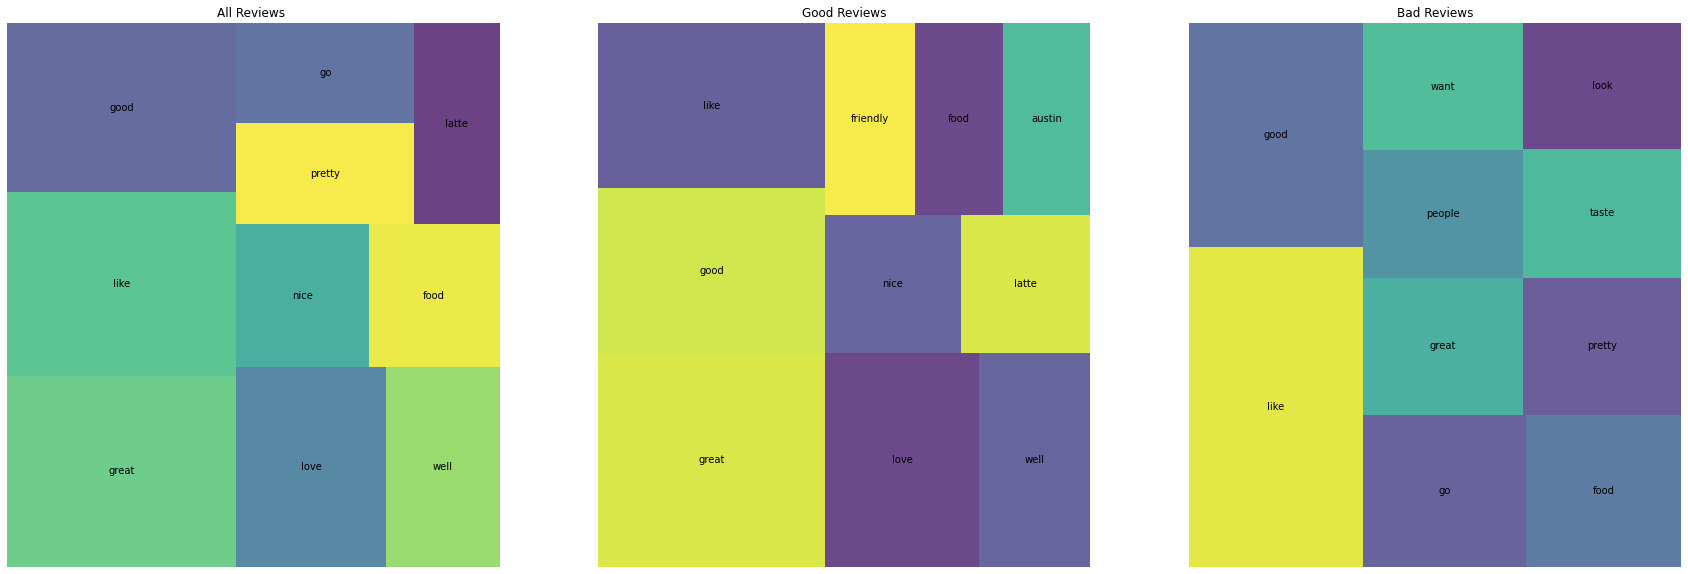

In [19]:
import squarify
import matplotlib.pyplot as plt


wc_top10 = wc[wc['rank'] <= 10]
wc_good_top10 = wc_good[wc_good['rank'] <= 10]
wc_bad_top10 = wc_bad[wc_bad['rank'] <= 10]

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

axes[0].set_title('All Reviews ')
squarify.plot(sizes=wc_top10['pct_total'], label=wc_top10['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Good Reviews')
squarify.plot(sizes=wc_good_top10['pct_total'], label=wc_good_top10['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

axes[2].set_title('Bad Reviews')
squarify.plot(sizes=wc_bad_top10['pct_total'], label=wc_bad_top10['word'], alpha=.8, ax=axes[2])
axes[2].axis('off')

plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [20]:
import numpy as np

good_bad_wc = pd.merge(wc_good, wc_bad, how='outer',on='word', suffixes=('_good','_bad'))

display(good_bad_wc.shape)
display(good_bad_wc.isnull().sum())
good_bad_wc.replace(np.nan, 0, inplace=True)
display(good_bad_wc.isnull().sum())

good_bad_wc.head()

(35165, 13)

word                       0
appears_in_good         5470
count_good              5470
rank_good               5470
pct_total_good          5470
cul_pct_total_good      5470
appears_in_pct_good     5470
appears_in_bad         21332
count_bad              21332
rank_bad               21332
pct_total_bad          21332
cul_pct_total_bad      21332
appears_in_pct_bad     21332
dtype: int64

word                   0
appears_in_good        0
count_good             0
rank_good              0
pct_total_good         0
cul_pct_total_good     0
appears_in_pct_good    0
appears_in_bad         0
count_bad              0
rank_bad               0
pct_total_bad          0
cul_pct_total_bad      0
appears_in_pct_bad     0
dtype: int64

,word,appears_in_good,count_good,rank_good,pct_total_good,cul_pct_total_good,appears_in_pct_good,appears_in_bad,count_bad,rank_bad,pct_total_bad,cul_pct_total_bad,appears_in_pct_bad
0,great,2187.0,2921.0,1.0,0.010817,0.010817,0.356189,268.0,353.0,5.0,0.004592,0.034345,0.181572
1,good,1707.0,2273.0,2.0,0.008417,0.019234,0.278013,452.0,624.0,2.0,0.008118,0.019722,0.306233
2,like,1596.0,2261.0,3.0,0.008373,0.027607,0.259935,575.0,892.0,1.0,0.011604,0.011604,0.389566
3,love,1547.0,1995.0,4.0,0.007388,0.034995,0.251954,202.0,244.0,18.0,0.003174,0.084432,0.136856
4,well,1213.0,1436.0,5.0,0.005318,0.040313,0.197557,217.0,257.0,15.0,0.003343,0.074831,0.147019


In [21]:
good_bad_wc['freq_diff'] = (good_bad_wc.pct_total_good - good_bad_wc.pct_total_bad).apply(lambda x: round(x,3))

 # rank the freq diffs
good_bad_wc['gb_diff_rank'] = good_bad_wc['freq_diff'].rank(method='first', ascending=False)
good_bad_wc['bg_diff_rank'] = good_bad_wc['freq_diff'].rank(method='first')

good_diff_wc = good_bad_wc.sort_values(by='gb_diff_rank')
bad_diff_wc = good_bad_wc.sort_values(by='bg_diff_rank')

display(good_diff_wc.head(10))
display(bad_diff_wc.head(10))

,word,appears_in_good,count_good,rank_good,pct_total_good,cul_pct_total_good,appears_in_pct_good,appears_in_bad,count_bad,rank_bad,pct_total_bad,cul_pct_total_bad,appears_in_pct_bad,freq_diff,gb_diff_rank,bg_diff_rank
0,great,2187.0,2921.0,1.0,0.010817,0.010817,0.356189,268.0,353.0,5.0,0.004592,0.034345,0.181572,0.006,1.0,35165.0
3,love,1547.0,1995.0,4.0,0.007388,0.034995,0.251954,202.0,244.0,18.0,0.003174,0.084432,0.136856,0.004,2.0,35164.0
4,well,1213.0,1436.0,5.0,0.005318,0.040313,0.197557,217.0,257.0,15.0,0.003343,0.074831,0.147019,0.002,3.0,35158.0
7,friendly,1006.0,1036.0,8.0,0.003837,0.052349,0.163844,122.0,134.0,67.0,0.001743,0.196703,0.082656,0.002,4.0,35159.0
10,definitely,889.0,1002.0,11.0,0.003711,0.063595,0.144788,122.0,152.0,53.0,0.001977,0.171101,0.082656,0.002,5.0,35160.0
32,favorite,577.0,664.0,33.0,0.002459,0.129224,0.093974,43.0,49.0,259.0,0.000637,0.394851,0.029133,0.002,6.0,35161.0
33,delicious,629.0,664.0,34.0,0.002459,0.131682,0.102443,34.0,34.0,397.0,0.000442,0.467080,0.023035,0.002,7.0,35162.0
49,perfect,505.0,556.0,50.0,0.002059,0.167285,0.082248,30.0,33.0,416.0,0.000429,0.475301,0.020325,0.002,8.0,35163.0
5,nice,988.0,1135.0,6.0,0.004203,0.044516,0.160912,235.0,278.0,14.0,0.003617,0.071487,0.159214,0.001,9.0,35107.0
6,latte,798.0,1079.0,7.0,0.003996,0.048512,0.129967,164.0,206.0,29.0,0.002680,0.115745,0.111111,0.001,10.0,35108.0


,word,appears_in_good,count_good,rank_good,pct_total_good,cul_pct_total_good,appears_in_pct_good,appears_in_bad,count_bad,rank_bad,pct_total_bad,cul_pct_total_bad,appears_in_pct_bad,freq_diff,gb_diff_rank,bg_diff_rank
2,like,1596.0,2261.0,3.0,0.008373,0.027607,0.259935,575.0,892.0,1.0,0.011604,0.011604,0.389566,-0.003,35164.0,1.0
123,ask,290.0,319.0,124.0,0.001181,0.282670,0.047231,212.0,311.0,12.0,0.004046,0.063877,0.143631,-0.003,35165.0,2.0
13,go,792.0,932.0,14.0,0.003451,0.074283,0.128990,306.0,395.0,3.0,0.005139,0.024861,0.207317,-0.002,35159.0,3.0
31,taste,583.0,689.0,32.0,0.002552,0.126765,0.094951,247.0,325.0,9.0,0.004228,0.051609,0.167344,-0.002,35160.0,4.0
41,service,582.0,604.0,42.0,0.002237,0.150158,0.094788,261.0,315.0,11.0,0.004098,0.059831,0.176829,-0.002,35161.0,5.0
173,say,216.0,240.0,174.0,0.000889,0.333852,0.035179,150.0,215.0,26.0,0.002797,0.107601,0.101626,-0.002,35162.0,6.0
178,customer,212.0,235.0,179.0,0.000870,0.338255,0.034528,156.0,229.0,21.0,0.002979,0.093408,0.105691,-0.002,35163.0,7.0
8,food,843.0,1022.0,9.0,0.003785,0.056133,0.137296,270.0,376.0,4.0,0.004892,0.029753,0.182927,-0.001,35108.0,8.0
11,pretty,791.0,993.0,12.0,0.003677,0.067273,0.128827,278.0,349.0,6.0,0.004540,0.038885,0.188347,-0.001,35109.0,9.0
14,people,769.0,897.0,15.0,0.003322,0.077604,0.125244,247.0,327.0,7.0,0.004254,0.043139,0.167344,-0.001,35110.0,10.0


In [22]:
good_diff_wc_top = good_diff_wc[good_diff_wc.gb_diff_rank <= 10]
display(good_diff_wc_top.shape)
display(good_diff_wc_top)

bad_diff_wc_top = bad_diff_wc[bad_diff_wc.bg_diff_rank <= 10]
display(bad_diff_wc_top.shape)
display(bad_diff_wc_top)

(10, 16)

,word,appears_in_good,count_good,rank_good,pct_total_good,cul_pct_total_good,appears_in_pct_good,appears_in_bad,count_bad,rank_bad,pct_total_bad,cul_pct_total_bad,appears_in_pct_bad,freq_diff,gb_diff_rank,bg_diff_rank
0,great,2187.0,2921.0,1.0,0.010817,0.010817,0.356189,268.0,353.0,5.0,0.004592,0.034345,0.181572,0.006,1.0,35165.0
3,love,1547.0,1995.0,4.0,0.007388,0.034995,0.251954,202.0,244.0,18.0,0.003174,0.084432,0.136856,0.004,2.0,35164.0
4,well,1213.0,1436.0,5.0,0.005318,0.040313,0.197557,217.0,257.0,15.0,0.003343,0.074831,0.147019,0.002,3.0,35158.0
7,friendly,1006.0,1036.0,8.0,0.003837,0.052349,0.163844,122.0,134.0,67.0,0.001743,0.196703,0.082656,0.002,4.0,35159.0
10,definitely,889.0,1002.0,11.0,0.003711,0.063595,0.144788,122.0,152.0,53.0,0.001977,0.171101,0.082656,0.002,5.0,35160.0
32,favorite,577.0,664.0,33.0,0.002459,0.129224,0.093974,43.0,49.0,259.0,0.000637,0.394851,0.029133,0.002,6.0,35161.0
33,delicious,629.0,664.0,34.0,0.002459,0.131682,0.102443,34.0,34.0,397.0,0.000442,0.467080,0.023035,0.002,7.0,35162.0
49,perfect,505.0,556.0,50.0,0.002059,0.167285,0.082248,30.0,33.0,416.0,0.000429,0.475301,0.020325,0.002,8.0,35163.0
5,nice,988.0,1135.0,6.0,0.004203,0.044516,0.160912,235.0,278.0,14.0,0.003617,0.071487,0.159214,0.001,9.0,35107.0
6,latte,798.0,1079.0,7.0,0.003996,0.048512,0.129967,164.0,206.0,29.0,0.002680,0.115745,0.111111,0.001,10.0,35108.0


(10, 16)

,word,appears_in_good,count_good,rank_good,pct_total_good,cul_pct_total_good,appears_in_pct_good,appears_in_bad,count_bad,rank_bad,pct_total_bad,cul_pct_total_bad,appears_in_pct_bad,freq_diff,gb_diff_rank,bg_diff_rank
2,like,1596.0,2261.0,3.0,0.008373,0.027607,0.259935,575.0,892.0,1.0,0.011604,0.011604,0.389566,-0.003,35164.0,1.0
123,ask,290.0,319.0,124.0,0.001181,0.282670,0.047231,212.0,311.0,12.0,0.004046,0.063877,0.143631,-0.003,35165.0,2.0
13,go,792.0,932.0,14.0,0.003451,0.074283,0.128990,306.0,395.0,3.0,0.005139,0.024861,0.207317,-0.002,35159.0,3.0
31,taste,583.0,689.0,32.0,0.002552,0.126765,0.094951,247.0,325.0,9.0,0.004228,0.051609,0.167344,-0.002,35160.0,4.0
41,service,582.0,604.0,42.0,0.002237,0.150158,0.094788,261.0,315.0,11.0,0.004098,0.059831,0.176829,-0.002,35161.0,5.0
173,say,216.0,240.0,174.0,0.000889,0.333852,0.035179,150.0,215.0,26.0,0.002797,0.107601,0.101626,-0.002,35162.0,6.0
178,customer,212.0,235.0,179.0,0.000870,0.338255,0.034528,156.0,229.0,21.0,0.002979,0.093408,0.105691,-0.002,35163.0,7.0
8,food,843.0,1022.0,9.0,0.003785,0.056133,0.137296,270.0,376.0,4.0,0.004892,0.029753,0.182927,-0.001,35108.0,8.0
11,pretty,791.0,993.0,12.0,0.003677,0.067273,0.128827,278.0,349.0,6.0,0.004540,0.038885,0.188347,-0.001,35109.0,9.0
14,people,769.0,897.0,15.0,0.003322,0.077604,0.125244,247.0,327.0,7.0,0.004254,0.043139,0.167344,-0.001,35110.0,10.0


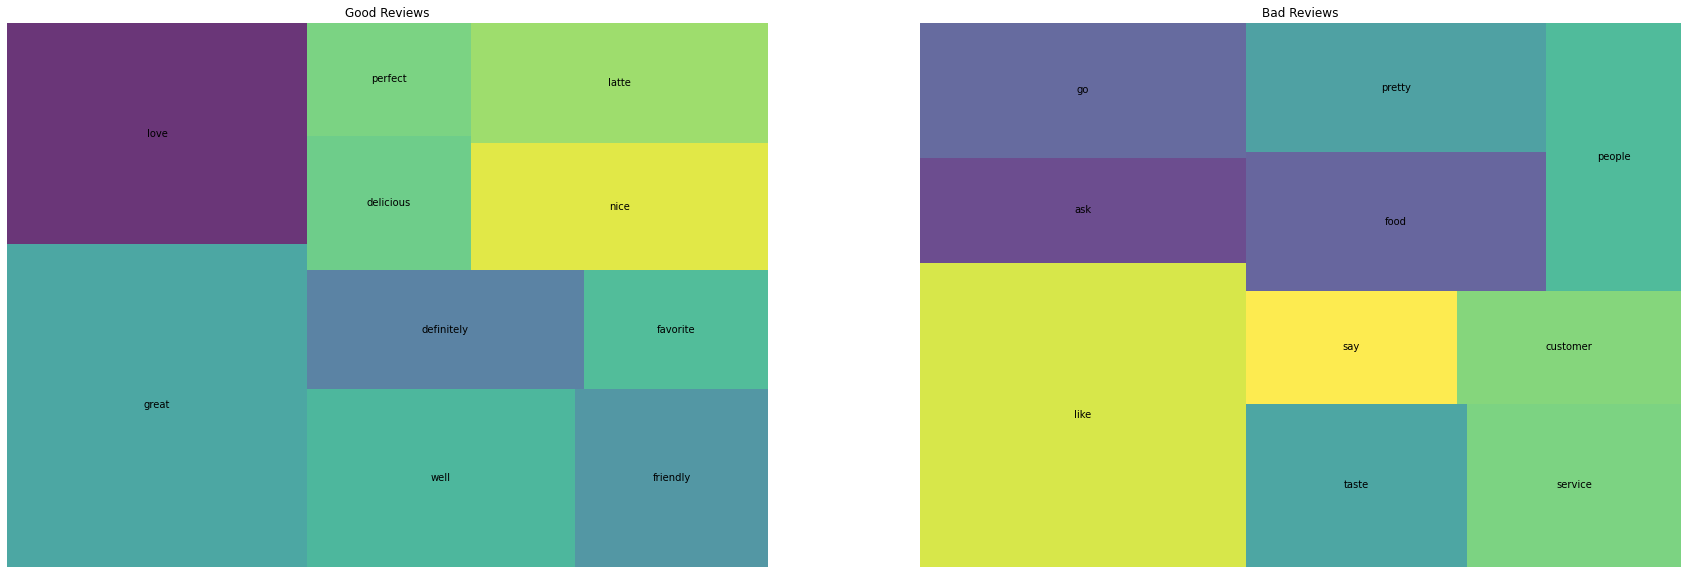

In [23]:

fig, axes = plt.subplots(1, 2, figsize=(30, 10))


axes[0].set_title('Good Reviews')
squarify.plot(sizes=good_diff_wc_top['pct_total_good'], label=good_diff_wc_top['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Bad Reviews')
squarify.plot(sizes=bad_diff_wc_top['pct_total_bad'], label=bad_diff_wc_top['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

plt.show()

If the review has words like 'great', 'love', 'friendly', 'favorite', 'delicious', 'perfect' or 'nice' there's a very good chance that the reviewer thinks the coffee shop is good.

If the review has words like 'want', 'customer', 'service', 'food', 'like', 'ask', or 'taste' there's a good chance that the reviewer does not think the coffee shop is good.

In [24]:
# Create a copy and add column with product tags
subset_shops = shops.copy()
subset_shops.loc[subset_shops.star_rating <= 3, 'rating'] = 'Bad'
subset_shops.loc[subset_shops.star_rating >= 4, 'rating'] = 'Good'


# Confirm shape and distribution of reviews
print(subset_shops.shape)
subset_shops['rating'].value_counts()

(7616, 5)


Good    6140
Bad     1476
Name: rating, dtype: int64

In [25]:
import scattertext as st

nlp = sp_load('en_core_web_lg')

corpus = st.CorpusFromPandas(subset_shops, 
                             category_col='rating', 
                             text_col='full_review_text',
                             nlp=nlp).build()

html = st.produce_scattertext_explorer(
    corpus,
    category='Good',
    category_name='Good Rating',
    not_category_name='Bad Rating',
    width_in_pixels=1000,
    metadata=subset_shops['star_rating'])

open('./coffee_shop_reviews.html', 'w').write(html)

6496280

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

